#     

In [284]:
%reset -f

In [108]:
import random
from math import sqrt, sin, cos, exp, pow, pi, log
import handcalcs.render
import numpy as np
import sympy as sp
from sympy import Symbol as symbol
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
PD = 184
import scipy.stats as stats
from scipy import integrate
%matplotlib inline

# Завдання 1

1. Розрахуйте за допомогою методу Монте-Карло площу кола радіусом r і з координатами центру (a, b). Величини r, a, b приміть випадковими числами. Число випробувань прийміть 1000.Виконайте графічні побудови, що пояснюють розрахунок.Налаштуйте графіки таким чином, щоб точки, які потрапили в коло, були червоного кольору, а не потрапили в нього - синього кольору.

In [138]:
class data:
    def __init__(self, _X, _Y, _color='tab:orange'):
        self.X = _X; self.Y = _Y; self.color = _color
def prePlot():
    fig = plt.figure(dpi=PD)
def plotHist(item):
    plt.twinx().hist(item.X, item.Y, color=item.color)
def plotLine(item):
    plt.plot(item.X, item.Y, linestyle='solid', marker='None', color=item.color)
def plotPoint(item):
    plt.plot(item.X, item.Y, linestyle='none', marker='.', color=item.color)
def plotPixel(item):
    plt.plot(item.X, item.Y, linestyle='none', marker=',', color=item.color)
def plotAxisLabels(xl, yl):
    plt.xlabel(xl); plt.ylabel(yl)
def postPlot(scale=True):
    if scale == True:
        plt.axis('scaled')
    print(fig)
    plt.figure().clear()

In [77]:
r = random.uniform(4, 100) * random.random()
x0 = random.uniform(-10, 10)
y0 = random.uniform(-10, 10)

In [78]:
#%%render # Short
N = 100000
r
x0
y0
h = r / 720                  # кутовий крок
n = int((2 * pi) / h) + 1    # кількість кроків

Figure(1104x736)


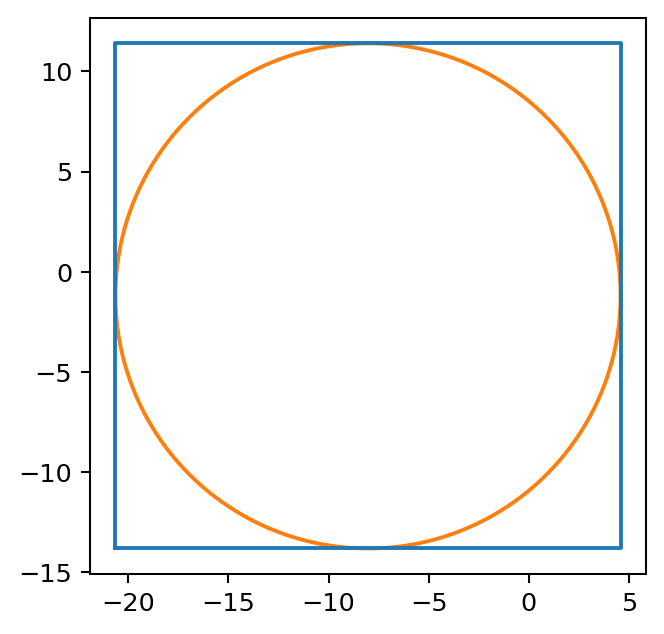

<Figure size 432x288 with 0 Axes>

In [79]:
t = [i * h for i in range(n)]
x_1 = [r * cos(ti) + x0 for ti in t];   y_1 = [r * sin(ti) + y0 for ti in t]
x_2 = [x0-r, x0-r, x0+r, x0+r, x0-r];   y_2 = [y0-r, y0+r, y0+r, y0-r, y0-r]

prePlot()
plotLine(data(x_1, y_1))
plotLine(data(x_2, y_2,'tab:blue')); postPlot()

Figure(1104x736)


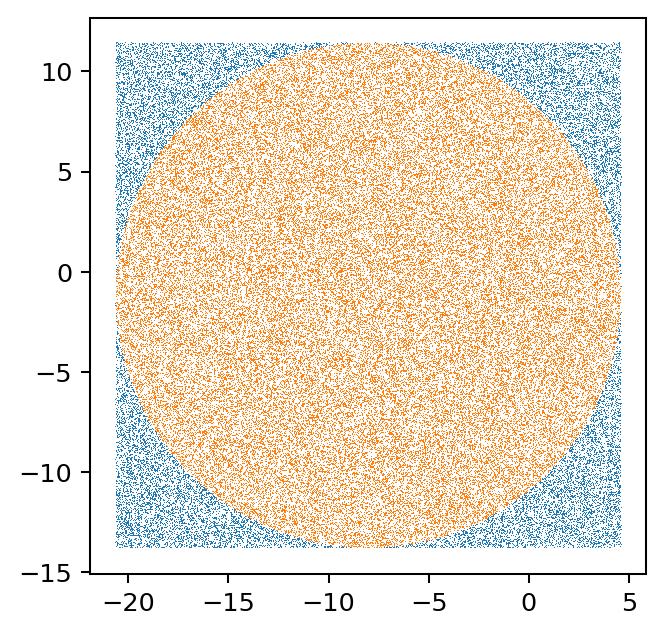

<Figure size 432x288 with 0 Axes>

In [80]:
def mc_circle(N, x0, y0, r):
    f = [[], []]
    F = [[], []]
    x_neg, x_pos = x0 - r, x0 + r
    y_neg, y_pos = y0 - r, y0 + r
    for i in range(0, N):
        x = random.uniform(x_neg, x_pos)
        y = random.uniform(y_neg, y_pos)
        if (x - x0)**2 + (y - y0)**2 <= (r)**2:
            f[0].append(x)
            f[1].append(y)
        else:
            F[0].append(x)
            F[1].append(y)
    return f, F

f, F = mc_circle(N, x0, y0, r)

prePlot()
plotPixel(data(f[0], f[1]))
plotPixel(data(F[0], F[1],'tab:blue')); postPlot()

In [143]:
%%render # Short
circleArea_count = len(f[0])
otherArea_count = len(F[0])
square_S = (2*r)**2
proportion = circleArea_count / N
circle_S_mc = square_S * proportion
circle_S_formula = pi*r**2

<IPython.core.display.Latex object>

# Завдання 2

2. Розрахуйте за допомогою методу Монте-Карло площа фігури, обмеженої еліпсом з великою віссю a і малої віссю b. Координати перетину осей еліпса x0, y0, осі колінеарні декартових осях. Величини a, b, x0, y0 приміть випадковими числами.Виконайте графічні побудови, що пояснюють розрахунок.Налаштуйте графіки таким чином, щоб точки, які потрапили в коло, були червоного кольору, а не потрапили в нього - синього кольору. 

In [144]:
a = random.uniform(4, 100) * random.random()
b = random.uniform(4, 100) * random.random()
x0 = random.uniform(-10, 10)
y0 = random.uniform(-10, 10)

In [145]:
#%%render # Short
N = 100000
a
b
x0
y0
h = min(a,b) / 720                  # кутовий крок
n = int((2 * pi) / h) + 1    # кількість кроків

Figure(1104x736)


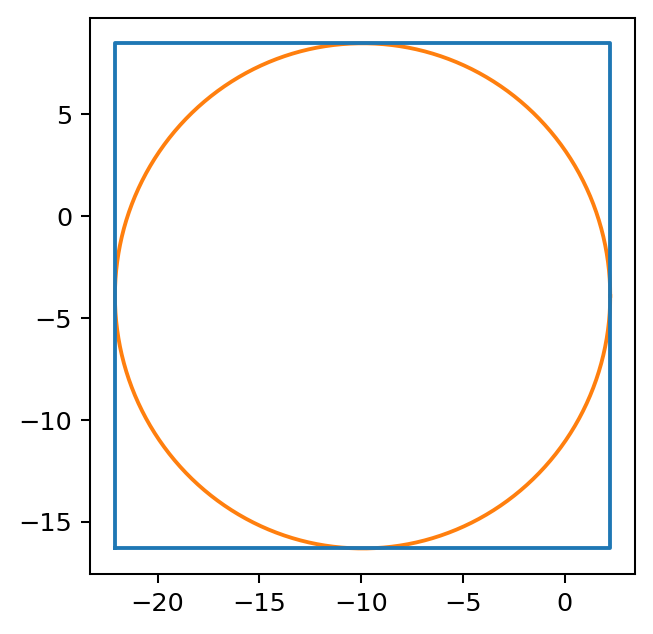

<Figure size 432x288 with 0 Axes>

In [146]:
t = [i * h for i in range(n)]
x_1 = [a * cos(ti) + x0 for ti in t];   y_1 = [b * sin(ti) + y0 for ti in t]
x_2 = [x0-a, x0-a, x0+a, x0+a, x0-a];   y_2 = [y0-b, y0+b, y0+b, y0-b, y0-b]

prePlot()
plotLine(data(x_1, y_1))
plotLine(data(x_2, y_2,'tab:blue')); postPlot()

Figure(1104x736)


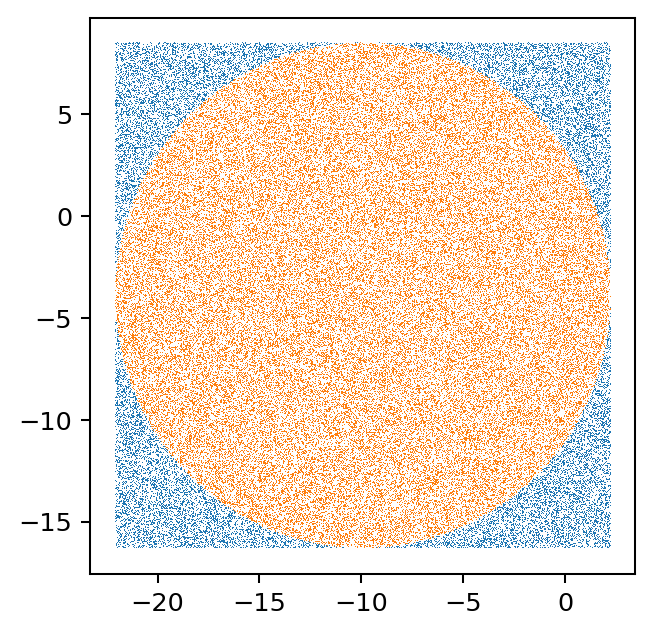

<Figure size 432x288 with 0 Axes>

In [147]:
def mc_ellipse(N, x0, y0, a, b):
    f = [[], []]
    F = [[], []]
    x_neg, x_pos = x0 - a, x0 + a
    y_neg, y_pos = y0 - b, y0 + b
    for i in range(0, N):
        x = random.uniform(x_neg, x_pos)
        y = random.uniform(y_neg, y_pos)
        if ((x - x0)/a)**2 + ((y - y0)/b)**2 <= 1:
            f[0].append(x)
            f[1].append(y)
        else:
            F[0].append(x)
            F[1].append(y)
    return f, F

f, F = mc_ellipse(N, x0, y0, a, b)

prePlot()
plotPixel(data(f[0], f[1]))
plotPixel(data(F[0], F[1],'tab:blue')); postPlot()

In [177]:
%%render # Short
circleArea_count = len(f[0])
otherArea_count = len(F[0])
square_S = 4*a*b
proportion = circleArea_count / N
circle_S_mc = square_S * proportion
circle_S_formula = pi*a*b

<IPython.core.display.Latex object>

# Завдання 3

3. Розрахуйте за допомогою методу Монте-Карло значення числа пі. Виконайте графічні побудови, що пояснюють розрахунок. Налаштуйте графіки таким чином, щою точки, які потрапили в коло, були червоного кольору, а не потрапили в нього - синього кольору.

In [87]:
r = random.uniform(4, 100) * random.random()

In [88]:
#%%render # Short
N = 100000
r
h = r / 180                # кутовий крок
n = int(pi / 2 / h) + 1    # кількість кроків

Figure(1104x736)


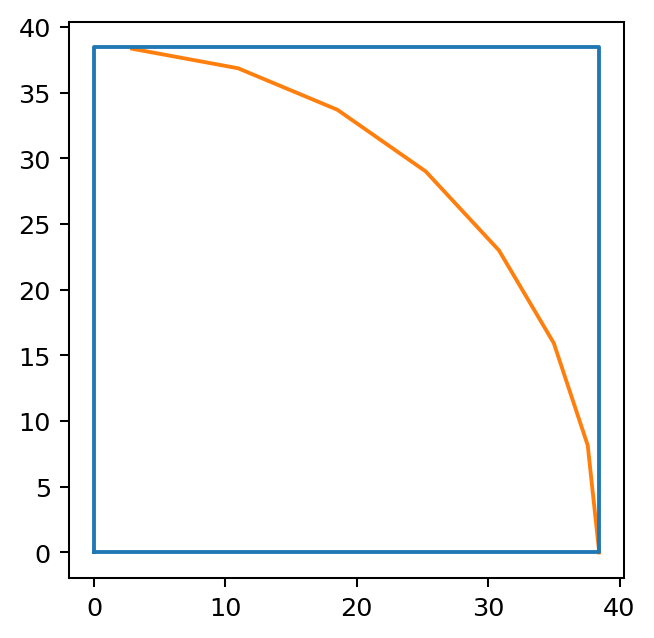

<Figure size 432x288 with 0 Axes>

In [89]:
t = [i * h for i in range(n)]
x_1 = [r * cos(ti) for ti in t];   y_1 = [r * sin(ti) for ti in t]
x_2 = [0, 0, r, r, 0];   y_2 = [0, r, r, 0, 0]

prePlot()
plotLine(data(x_1, y_1))
plotLine(data(x_2, y_2,'tab:blue')); postPlot()

Figure(1104x736)


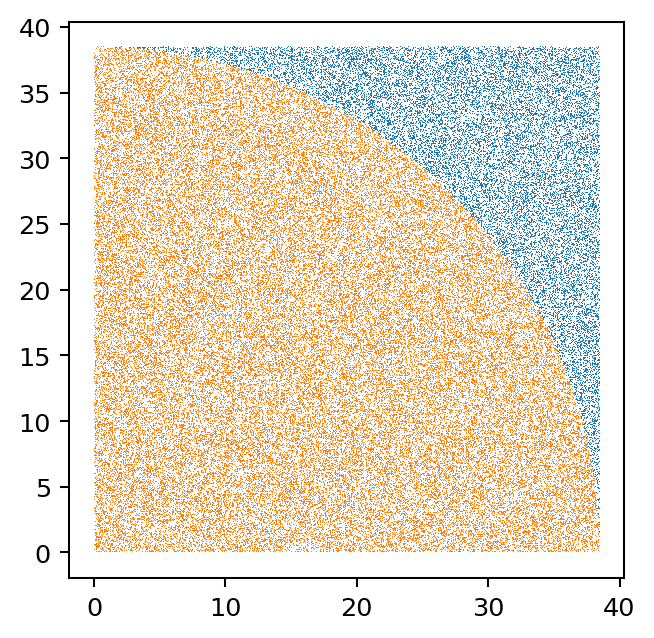

<Figure size 432x288 with 0 Axes>

In [90]:
def mc_pi(N, r):
    f = [[], []]
    F = [[], []]
    x_neg, x_pos = 0, r
    y_neg, y_pos = 0, r
    for i in range(0, N):
        x = random.uniform(x_neg, x_pos)
        y = random.uniform(y_neg, y_pos)
        if x**2 + y**2 <= r**2:
            f[0].append(x)
            f[1].append(y)
        else:
            F[0].append(x)
            F[1].append(y)
    return f, F

f, F = mc_pi(N, r)

prePlot()
plotPixel(data(f[0], f[1]))
plotPixel(data(F[0], F[1],'tab:blue')); postPlot()

In [91]:
#%%render # Short
radiusArea_count = len(f[0])
otherArea_count = len(F[0])
pi_mc = 4 * radiusArea_count / N
pi_builtin = pi

# Завдання 4

4. Розрахуйте потрійний інтеграл, наведений у прикладі, методом Монте-Карло. Виконайте розрахунок для N = 100, 250, 500, 750, 1000. Побудуйте графік відносної похибки.

In [154]:
#%%render
N = 1000
R = 2
h = 5
xmin = -1.2*R; xmax = 1.2*R
ymin = -1.2*R; ymax = 1.2*R
dx = (xmax-xmin)/N
dy = (ymax-ymin)/N

In [155]:
i = range(N)
j = range(N)
x = [xmin+item*dx for item in i]
y = [ymin+item*dy for item in j]
X,Y = np.meshgrid(x, y)
z = lambda x,y: h/R*sqrt(x**2+y**2)
M = np.array([[z(x[ii],y[jj]) for jj in j] for ii in i])

In [156]:
#%%render
rmax = sqrt(xmax**2 + ymax**2)
zmax = h/R*sqrt(xmax**2 + ymax**2)
koef = rmax/zmax
rh = h*koef

Figure(1104x736)


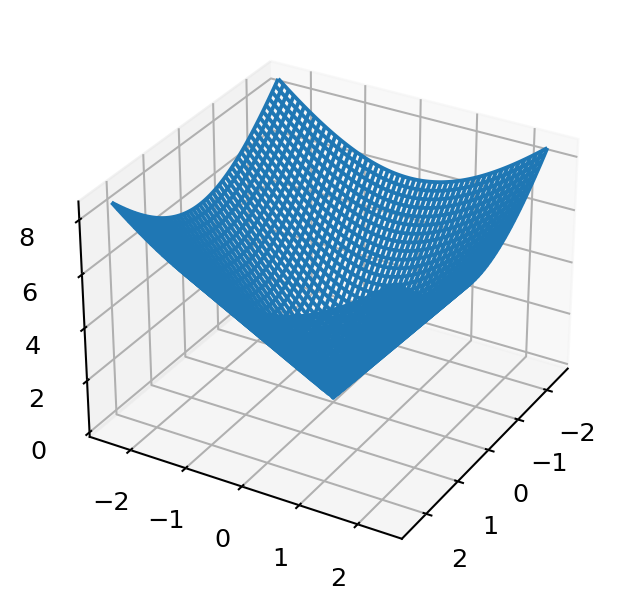

<Figure size 432x288 with 0 Axes>

In [157]:
fig = plt.figure(dpi=PD); ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, M) #0.3
ax.view_init(30, 30)
print(fig); plt.figure().clear()

In [170]:
def mc_integral(N):
    f = [[], [], []]
    F = [[], [], []]
    f_c = 0
    F_c = 0
    plotPurpose = [[0], [1]]
    #x_neg, x_pos = 0, r
    #y_neg, y_pos = 0, r
    for i in range(0, N):
        x = -rh + 2 * rh * np.random.rand()
        y = -rh + 2 * rh * np.random.rand()
        z = h * np.random.rand()
        if (z <= h) and (z >= h/R*sqrt(x**2 + y**2)) and (h/R*sqrt(x**2 + y**2)>=0):
            f[0].append(x)
            f[1].append(y)
            f[2].append(z)
            f_c += 1
        else:
            F[0].append(x)
            F[1].append(y)
            F[2].append(z)
            F_c += 1
        plotPurpose[0].append(f_c)
        plotPurpose[1].append(F_c)
    return f, F, plotPurpose

f, F, plotPurpose = mc_integral(N)

Figure(1104x736)
Figure(1104x736)


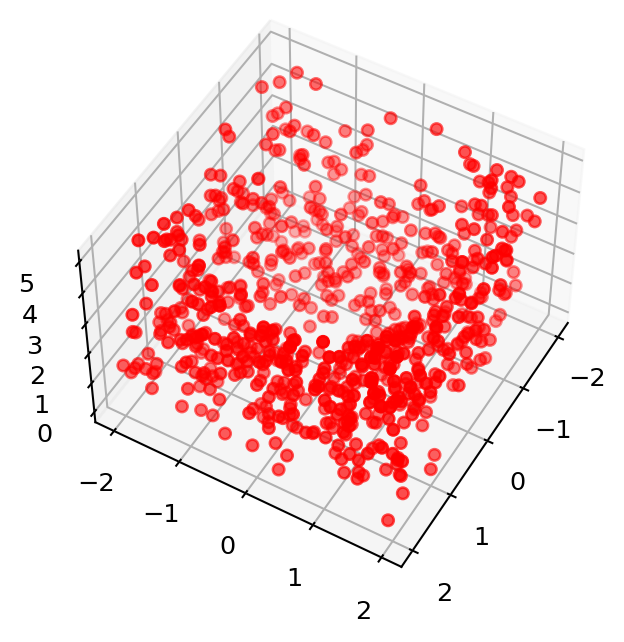

<Figure size 432x288 with 0 Axes>

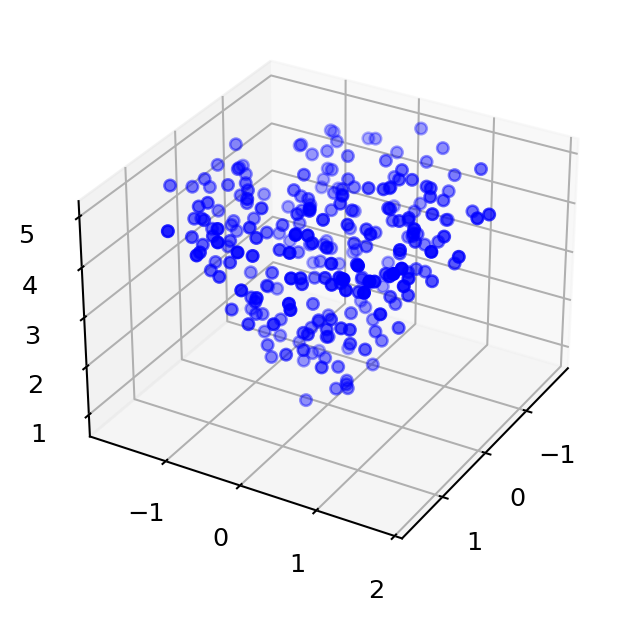

<Figure size 432x288 with 0 Axes>

In [171]:
fig = plt.figure(dpi=PD); ax = plt.axes(projection='3d')
ax.scatter(np.array(F[0]), np.array(F[1]), np.array(F[2]), c='red')
ax.view_init(50, 30)
print(fig); plt.figure().clear()

fig = plt.figure(dpi=PD); ax = plt.axes(projection='3d')
ax.scatter(np.array(f[0]), np.array(f[1]), np.array(f[2]), c='blue')
ax.view_init(30, 30)
print(fig); plt.figure().clear()

In [172]:
integral = sp.Integral(sp.Integral(sp.Integral(
    1, (symbol('x'), symbol('h')/symbol('R')*sp.sqrt(symbol('x')**2+symbol('y')**2), symbol('h'))),
       (symbol('y'), -sp.sqrt(symbol('rh')**2-symbol('x')**2), sp.sqrt(symbol('rh')**2-symbol('x')**2))),
       (symbol('z'), -symbol('rh'), symbol('rh'))); integral

Integral(1, (x, h*sqrt(x**2 + y**2)/R, h), (y, -sqrt(rh**2 - x**2), sqrt(rh**2 - x**2)), (z, -rh, rh))

In [173]:
integral_formula = integrate.nquad(lambda x,y,z: 1,
                                  [lambda x,y: [5*sqrt(x**2+y**2)/2, 5],
                                   lambda x: [-sqrt(rh**2-x**2), sqrt(rh**2-x**2)],
                                   lambda: [-rh, rh]])[0]

In [174]:
#%%render # Short
aboveSurface_count = len(f[0])
integral_mc = (2*rh)**2 * h * aboveSurface_count / N
integral_formula

20.943951023739743

Figure(1104x736)


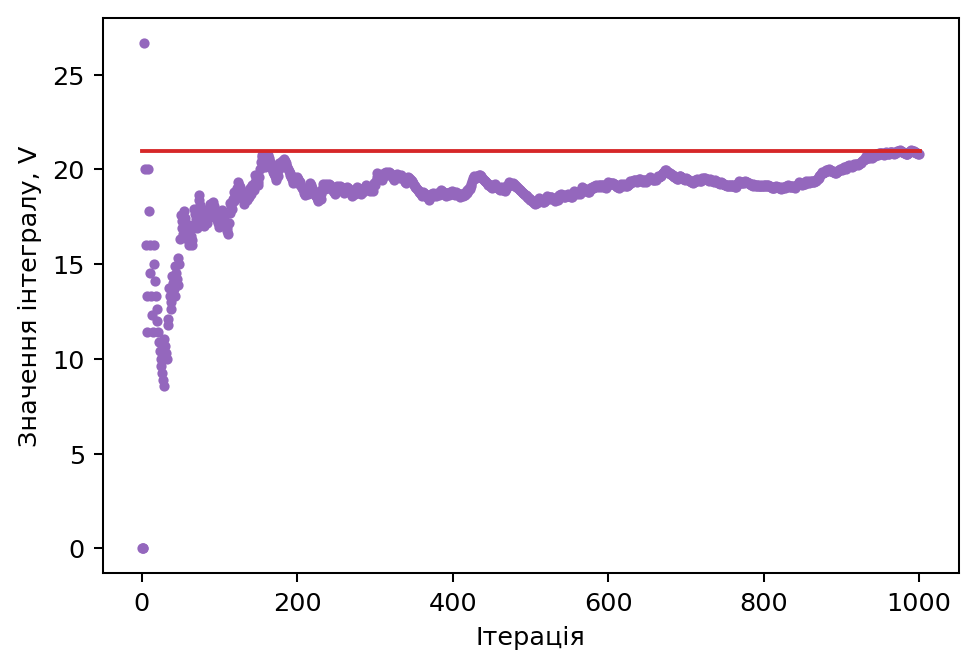

<Figure size 432x288 with 0 Axes>

In [175]:
X = []
Y = []
for i in range(len(plotPurpose[0])):
    X.append(i)
    Y.append( (2*rh)**2 * h * plotPurpose[0][i] / (plotPurpose[0][i] + plotPurpose[1][i]))
X_0 = []

prePlot()
plotPoint(data(X, Y,'tab:purple'))
plotLine(data([0, len(plotPurpose[0])], [integral_formula, integral_formula],'tab:red'))
plotAxisLabels('Ітерація','Значення інтегралу, V'); postPlot(scale=False)

Figure(1104x736)


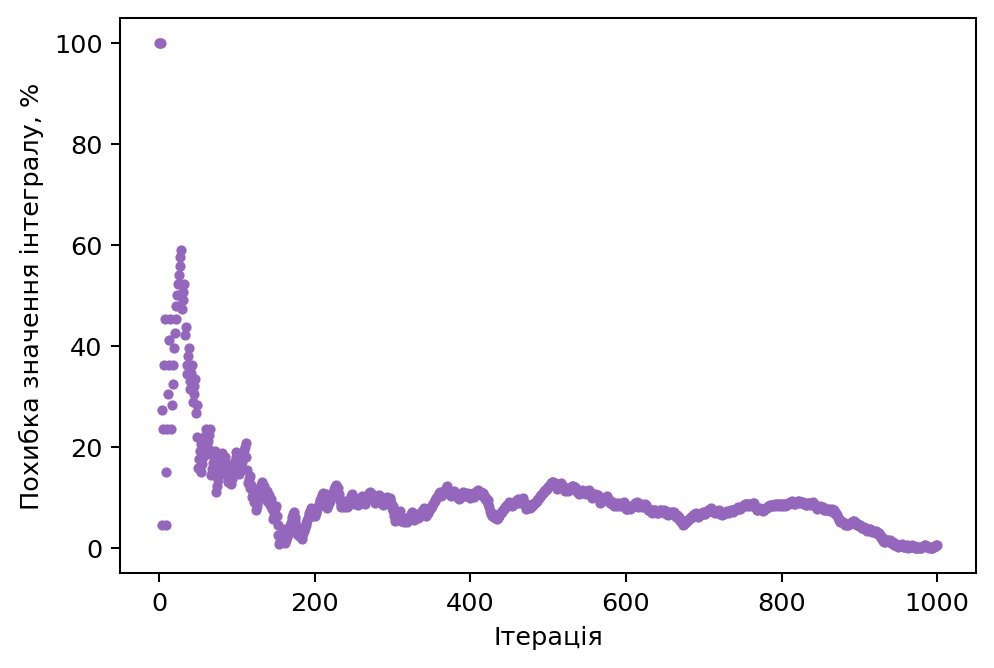

<Figure size 432x288 with 0 Axes>

In [176]:
X = []
Y = []
for i in range(len(plotPurpose[0])):
    X.append(i)
    Y.append(abs(((2*rh)**2 * h * plotPurpose[0][i] / (plotPurpose[0][i] + plotPurpose[1][i]) - integral_formula) / integral_formula * 100))
X_0 = []

prePlot()
plotPoint(data(X, Y,'tab:purple'))
plotAxisLabels('Ітерація','Похибка значення інтегралу, %'); postPlot(scale=False)